In [1]:
%matplotlib inline

from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels as ss
import seaborn as sns
import sys
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams['figure.figsize'] = [16, 10]
%matplotlib inline

# **Read Data**

In [4]:
!unzip /content/data_block10.zip

Archive:  /content/data_block10.zip
  inflating: block_10.csv            
  inflating: uk_bank_holidays.csv    
  inflating: weather_hourly_darksky.csv  


We can choose any certain person

In [7]:
df = pd.read_csv('block_10.csv', parse_dates=['day'])
df

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
0,MAC000322,2012-03-07,0.125,0.104,0.133,0.145,0.109,0.298,0.149,0.119,...,0.087,0.092,0.187,0.130,0.096,0.096,0.137,0.101,0.137,0.485
1,MAC000322,2012-03-08,0.279,0.247,0.253,0.275,0.114,0.105,0.117,0.141,...,0.105,0.132,0.252,0.105,0.096,0.129,0.120,0.070,0.039,0.074
2,MAC000322,2012-03-09,0.036,0.130,0.364,0.120,0.100,0.118,0.146,0.105,...,0.028,0.030,0.072,0.038,0.029,0.046,0.069,0.029,0.050,0.520
3,MAC000322,2012-03-10,0.435,0.093,0.105,0.138,0.099,0.096,0.133,0.129,...,0.120,0.125,0.115,0.101,0.142,0.112,0.099,0.150,0.152,0.097
4,MAC000322,2012-03-11,0.187,0.122,0.094,0.109,0.139,0.099,0.111,0.137,...,0.036,0.100,0.358,0.122,0.095,0.111,0.141,0.097,0.095,0.122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31473,MAC005354,2014-02-23,0.103,0.069,0.101,0.144,0.080,0.061,0.105,0.130,...,0.078,0.098,0.124,0.130,0.116,0.110,0.112,0.130,0.086,0.126
31474,MAC005354,2014-02-24,0.100,0.109,0.088,0.121,0.086,0.084,0.101,0.103,...,0.064,0.114,0.135,0.141,0.081,0.130,0.128,0.090,0.109,0.152
31475,MAC005354,2014-02-25,0.110,0.069,0.103,0.140,0.082,0.061,0.112,0.129,...,0.084,0.076,0.134,0.150,0.104,0.080,0.124,0.122,0.122,0.095
31476,MAC005354,2014-02-26,0.130,0.102,0.086,0.102,0.105,0.096,0.062,0.115,...,0.067,0.102,0.134,0.122,0.098,0.086,0.145,0.106,0.090,0.121


In [8]:
df = df[df['LCLid'] == 'MAC002928']
df

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
17623,MAC002928,2012-07-03,0.042,0.047,0.062,0.043,0.043,0.064,0.045,0.041,...,0.321,0.256,0.684,0.482,0.784,0.060,0.141,0.280,0.044,0.063
17624,MAC002928,2012-07-04,0.044,0.042,0.058,0.052,0.043,0.050,0.060,0.043,...,0.000,0.016,0.036,0.059,0.344,0.480,0.241,0.413,0.131,0.047
17625,MAC002928,2012-07-05,0.054,0.068,0.049,0.049,0.069,0.054,0.048,0.060,...,0.001,0.000,0.084,0.107,0.056,0.047,0.166,0.214,0.189,0.245
17626,MAC002928,2012-07-06,0.102,0.049,0.048,0.069,0.053,0.049,0.063,0.061,...,0.110,0.016,0.056,0.071,0.047,0.062,0.055,0.269,0.188,0.312
17627,MAC002928,2012-07-07,0.085,0.060,0.059,0.047,0.055,0.064,0.047,0.050,...,0.214,0.193,0.217,0.205,0.475,0.525,0.513,0.502,0.506,1.064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18213,MAC002928,2014-02-23,0.099,0.055,0.069,0.050,0.048,0.063,0.059,0.048,...,0.056,0.278,0.952,1.275,0.527,0.260,0.189,0.181,0.287,0.434
18214,MAC002928,2014-02-24,0.169,0.048,0.222,0.280,0.049,0.059,0.064,0.048,...,0.524,1.007,0.751,0.381,0.334,0.100,0.052,0.080,0.083,0.099
18215,MAC002928,2014-02-25,0.048,0.051,0.069,0.049,0.047,0.068,0.054,0.048,...,0.746,1.395,0.650,0.442,0.317,0.068,0.181,0.264,0.218,0.362
18216,MAC002928,2014-02-26,0.169,0.066,0.056,0.048,0.060,0.061,0.047,0.053,...,0.274,0.588,0.872,0.377,0.342,0.247,0.056,0.224,0.151,0.350


# **Data Preprocessing**

The data has row per day, with columns of 30 min intervals, we need only one column with datetime instead of 48 columns to represent the time and another column with the energy consumption for each 30 min interval.

In [9]:
def convert_standard_form_to_expand_time_series(standard_df,  verbose=False):
    # Similar to compact steps
    expand_df = pd.melt(standard_df, id_vars=['day','LCLid'],value_name='energy_consumption',var_name='offset')
    expand_df['offset'] = expand_df['offset'].str.replace('hh_','').astype(int)
    expand_df = expand_df.sort_values(by=['day','offset']).reset_index(drop=True)
    expand_df['frequency'] = '30min'
    expand_df['serie_length'] = len(expand_df)
    ## Here we resample our day column to construct a timestamp column with frequenct 30min
    expand_df['timestamp'] = pd.date_range(start=standard_df['day'].min(), freq='30min', periods=len(expand_df))
    ## Drop unnecessary columns
    expand_df = expand_df.drop(columns=['day','offset'])
    expand_df = expand_df[['LCLid','timestamp','energy_consumption','frequency','serie_length']]
    if verbose:
        display(expand_df)
    return expand_df

In [10]:
expanded_df = convert_standard_form_to_expand_time_series(df).drop(columns=['serie_length','frequency'])
expanded_df

,LCLid,timestamp,energy_consumption
0,MAC002928,2012-07-03 00:00:00,0.042
1,MAC002928,2012-07-03 00:30:00,0.047
2,MAC002928,2012-07-03 01:00:00,0.062
3,MAC002928,2012-07-03 01:30:00,0.043
4,MAC002928,2012-07-03 02:00:00,0.043
...,...,...,...
28555,MAC002928,2014-02-17 21:30:00,0.761
28556,MAC002928,2014-02-17 22:00:00,0.308
28557,MAC002928,2014-02-17 22:30:00,0.447
28558,MAC002928,2014-02-17 23:00:00,0.261


Let's convert this data to weekly data

In [11]:
def plot_time_series(df,title='Energy Consumption Over Time'):
    plt.figure(figsize=(20,5))
    plt.plot(df['timestamp'], df['energy_consumption'], label= "True Data", color='black')

    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Energy Consumption')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)

# **Visualization**

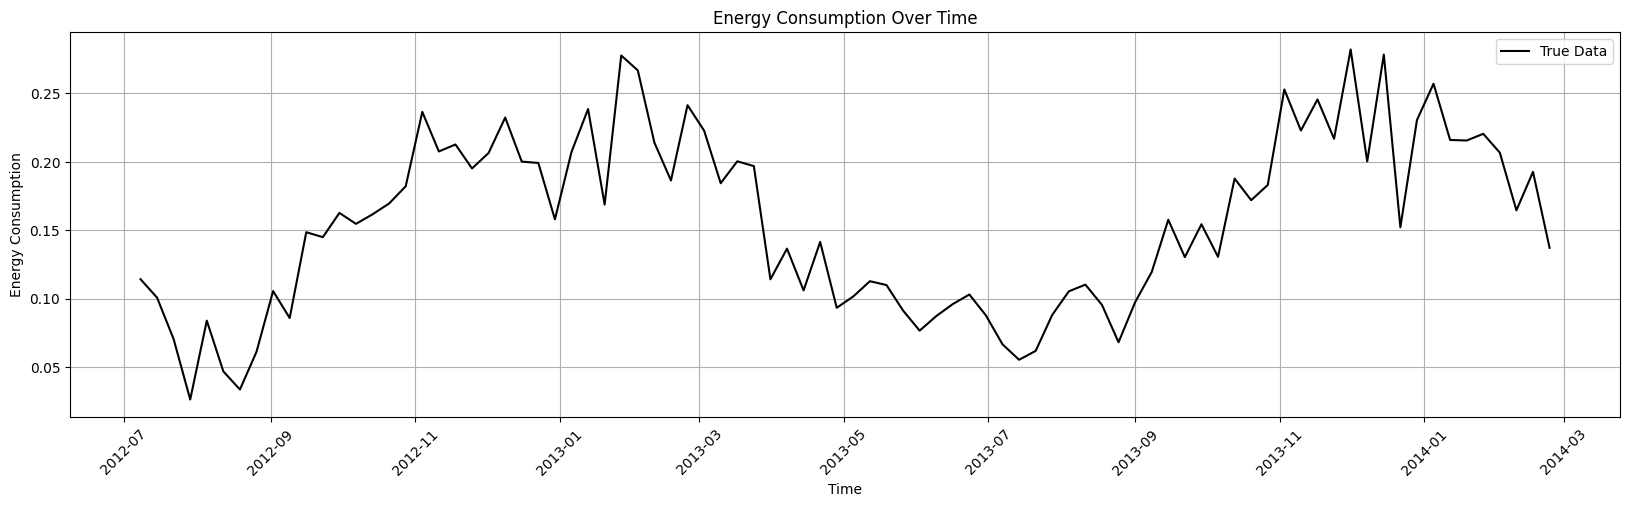

In [17]:
weekly_df = expanded_df.set_index('timestamp').groupby('LCLid').resample('W')['energy_consumption'].mean().round(4).reset_index()
plot_time_series(weekly_df)

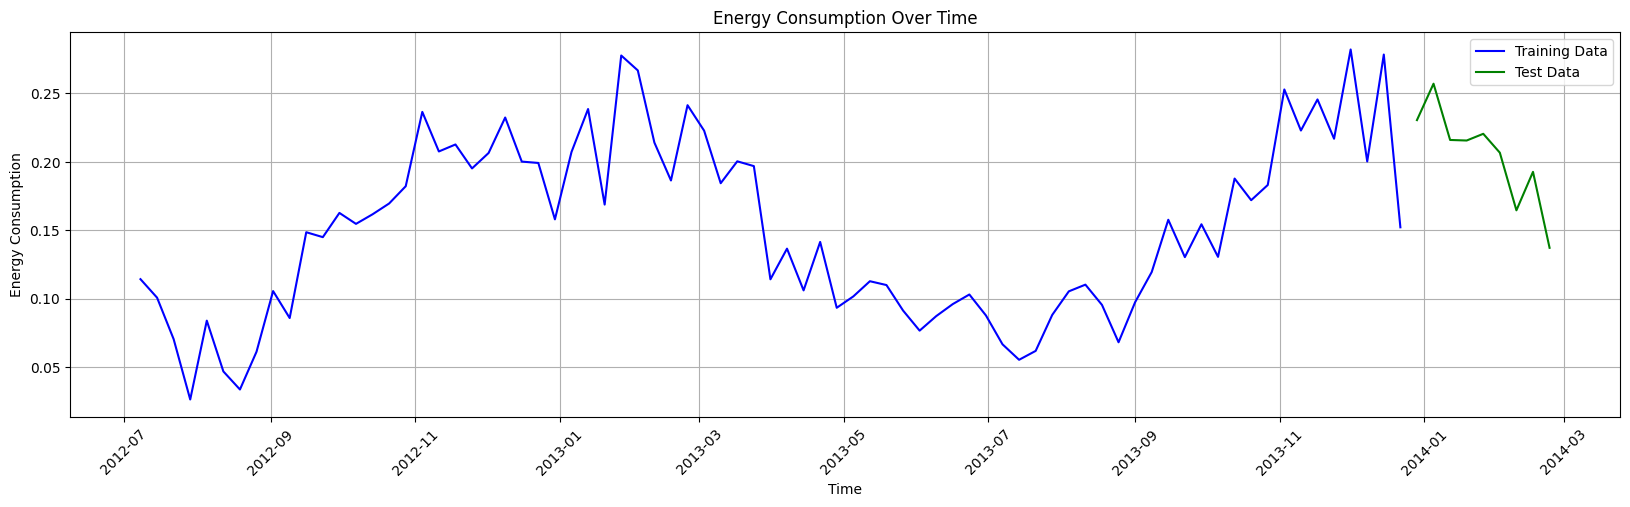

In [26]:
training_data = weekly_df[:int(len(weekly_df)*0.9)]
test_data = weekly_df[int(len(weekly_df)*0.9):]

def plot_training_test_data(training_data, test_data):
    plt.figure(figsize=(20,5))
    plt.plot(training_data['timestamp'], training_data['energy_consumption'], label='Training Data', color='blue')
    plt.plot(test_data['timestamp'], test_data['energy_consumption'], label='Test Data', color='green')

    plt.title('Energy Consumption Over Time')
    plt.xlabel('Time')
    plt.ylabel('Energy Consumption')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

plot_training_test_data(training_data, test_data)

# **Model Development**

In [45]:
!pip install -qU prophet

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [65]:
train = training_data.drop(columns=['LCLid'])
train.columns = ['ds', 'y']
train

,ds,y
ds,,
0,2012-07-08,0.1142
1,2012-07-15,0.1007
2,2012-07-22,0.0704
3,2012-07-29,0.0263
4,2012-08-05,0.0839
...,...,...
72,2013-11-24,0.2168
73,2013-12-01,0.2820
74,2013-12-08,0.2002


In [66]:
m1 = Prophet()
m1.fit(train)
future = m1.make_future_dataframe(periods=24)
future.tail(25)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfyyvcqc/q4nz7l7s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfyyvcqc/j7dmtwql.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=449', 'data', 'file=/tmp/tmpzfyyvcqc/q4nz7l7s.json', 'init=/tmp/tmpzfyyvcqc/j7dmtwql.json', 'output', 'file=/tmp/tmpzfyyvcqc/prophet_modelt8828t03/prophet_model-20250422212527.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:25:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:25:27 - cmdstanpy - INFO - Chain 

,ds
76,2013-12-22
77,2013-12-23
78,2013-12-24
79,2013-12-25
80,2013-12-26
81,2013-12-27
82,2013-12-28
83,2013-12-29
84,2013-12-30
85,2013-12-31


In [67]:
len(future)

101

In [68]:
forecast = m1.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-07-08,0.132729,0.049688,0.215454,0.132729,0.132729,0.0,0.0,0.0,0.0,0.0,0.0,0.132729
1,2012-07-15,0.133194,0.050593,0.210208,0.133194,0.133194,0.0,0.0,0.0,0.0,0.0,0.0,0.133194
2,2012-07-22,0.133659,0.052946,0.214217,0.133659,0.133659,0.0,0.0,0.0,0.0,0.0,0.0,0.133659
3,2012-07-29,0.134124,0.051762,0.215135,0.134124,0.134124,0.0,0.0,0.0,0.0,0.0,0.0,0.134124
4,2012-08-05,0.134589,0.055406,0.204635,0.134589,0.134589,0.0,0.0,0.0,0.0,0.0,0.0,0.134589
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2014-01-11,0.169404,0.087149,0.249610,0.169404,0.169404,0.0,0.0,0.0,0.0,0.0,0.0,0.169404
97,2014-01-12,0.169470,0.080303,0.243990,0.169470,0.169470,0.0,0.0,0.0,0.0,0.0,0.0,0.169470
98,2014-01-13,0.169537,0.089221,0.247941,0.169537,0.169537,0.0,0.0,0.0,0.0,0.0,0.0,0.169537
99,2014-01-14,0.169603,0.083095,0.247131,0.169603,0.169603,0.0,0.0,0.0,0.0,0.0,0.0,0.169603


In [69]:
  forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
96,2014-01-11,0.169404,0.087149,0.249610
97,2014-01-12,0.169470,0.080303,0.243990
98,2014-01-13,0.169537,0.089221,0.247941
99,2014-01-14,0.169603,0.083095,0.247131
100,2014-01-15,0.169669,0.088430,0.257906


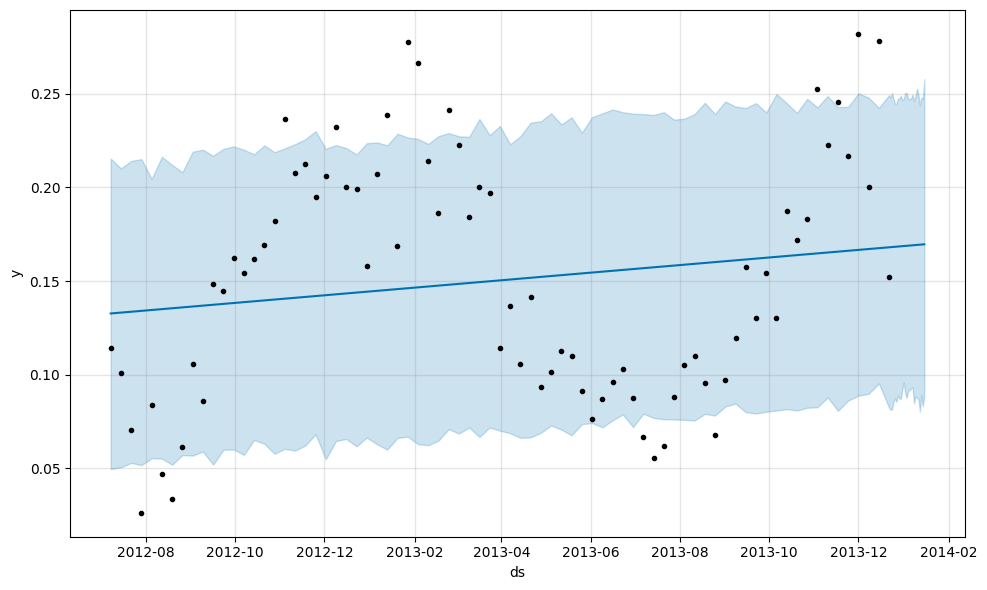

In [70]:
m1.plot(forecast);

Meaningless forecasting, we will try configuring the prophet model

# **Trying Different Models**

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfyyvcqc/lsygqxai.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfyyvcqc/ptl4cll_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15477', 'data', 'file=/tmp/tmpzfyyvcqc/lsygqxai.json', 'init=/tmp/tmpzfyyvcqc/ptl4cll_.json', 'output', 'file=/tmp/tmpzfyyvcqc/prophet_modelhlay4v5x/prophet_model-20250422214151.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:41:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:41:51 - cmdstanpy - INFO - Chain [1] d

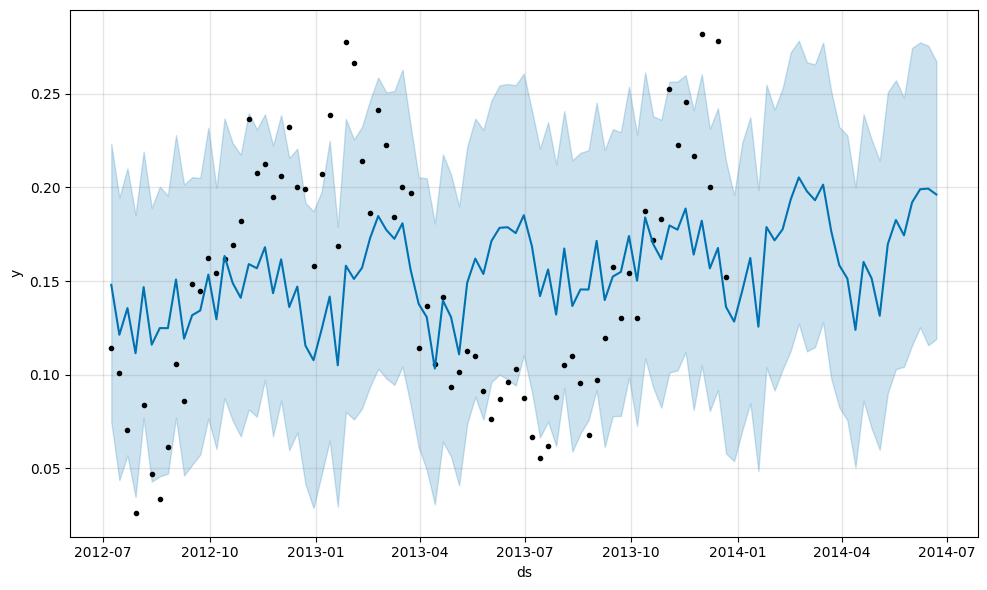

In [137]:
m2 = Prophet(
    seasonality_mode='additive'  # or 'multiplicative' depending on your needs
)

m2.add_seasonality(name='yearly', period=52, fourier_order=12, prior_scale=0.1)

m2.fit(train)

future = m2.make_future_dataframe(periods=26, freq='W')

# Predict using the new model
forecast = m2.predict(future)

m2.plot(forecast);

Not quite

## **Overfit Model**

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfyyvcqc/bc4ki4pb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfyyvcqc/bgcecl49.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25276', 'data', 'file=/tmp/tmpzfyyvcqc/bc4ki4pb.json', 'init=/tmp/tmpzfyyvcqc/bgcecl49.json', 'output', 'file=/tmp/tmpzfyyvcqc/prophet_modelvu5y_gpc/prophet_model-20250422214315.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:43:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:43:16 - cmdstanpy - INFO - Chain [1] d

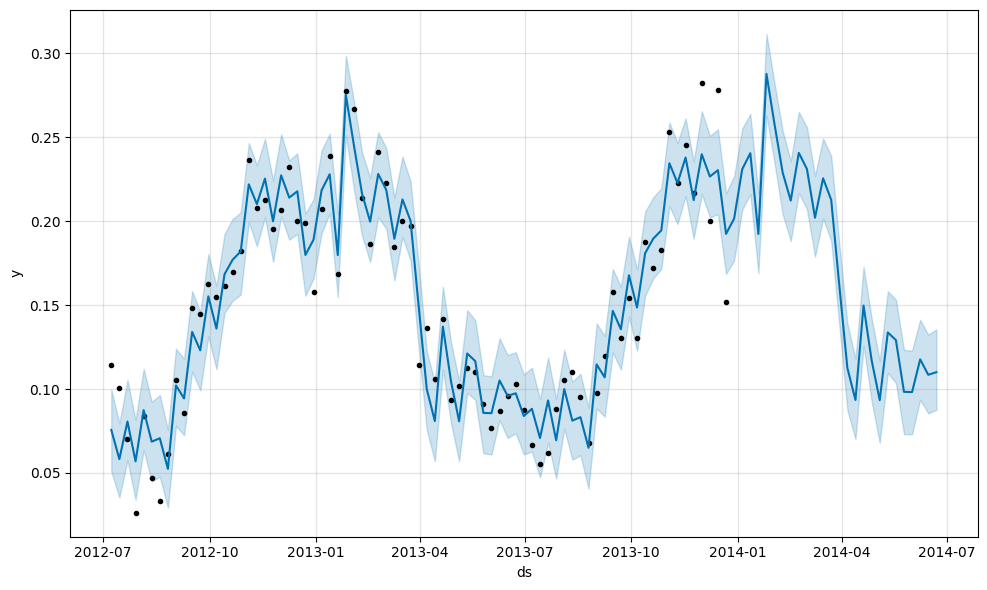

In [144]:
m2 = Prophet(
    seasonality_mode='additive'  # or 'multiplicative' depending on your needs
)

m2.add_seasonality(name='yearly', period=52, fourier_order=18, prior_scale=5)

m2.fit(train)

future = m2.make_future_dataframe(periods=26, freq='W')

# Predict using the new model
forecast = m2.predict(future)

m2.plot(forecast);

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfyyvcqc/d3q3pyz5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfyyvcqc/8llh3ags.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64540', 'data', 'file=/tmp/tmpzfyyvcqc/d3q3pyz5.json', 'init=/tmp/tmpzfyyvcqc/8llh3ags.json', 'output', 'file=/tmp/tmpzfyyvcqc/prophet_modelry3z1rgx/prophet_model-20250422214659.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:46:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:47:00 - cmdstanpy - INFO - Chain [1] d

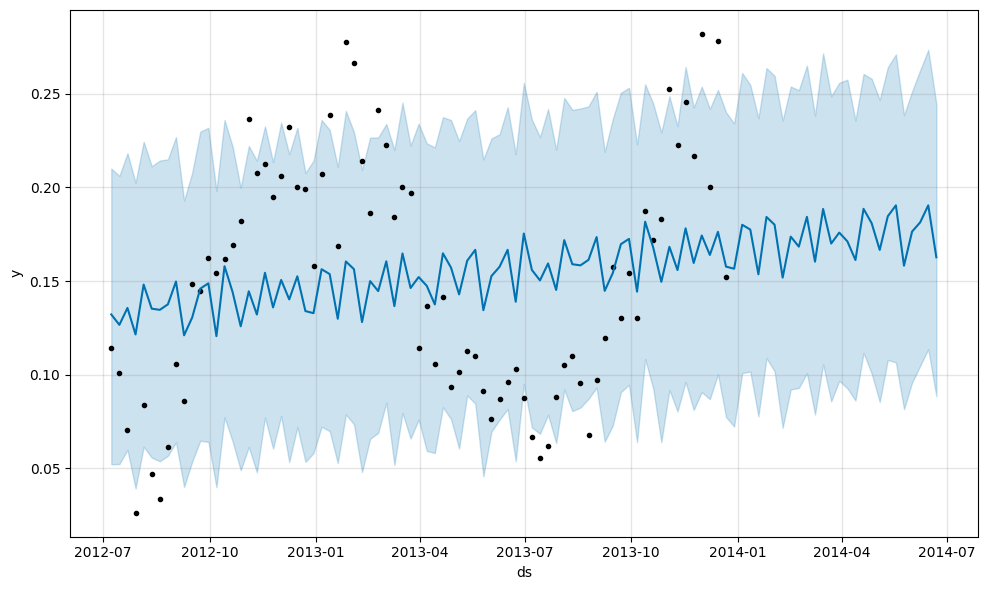

In [156]:
m2 = Prophet(
    seasonality_mode='additive',
    changepoint_prior_scale=0.05,  # Decrease from default 0.05 for smoother trend
    seasonality_prior_scale=0.1    # Decrease from default 10 for smoother seasonalities
)

# Reduce fourier_order for smoother seasonality
m2.add_seasonality(name='yearly', period=52, fourier_order=5, prior_scale=1)

m2.fit(train)

future = m2.make_future_dataframe(periods=26, freq='W')

# Predict using the new model
forecast = m2.predict(future)

m2.plot(forecast);

## **Multiplicative Seasonality Model**

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfyyvcqc/i5s0gwie.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfyyvcqc/f_pup64b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8350', 'data', 'file=/tmp/tmpzfyyvcqc/i5s0gwie.json', 'init=/tmp/tmpzfyyvcqc/f_pup64b.json', 'output', 'file=/tmp/tmpzfyyvcqc/prophet_model7h0eb8ty/prophet_model-20250422214747.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:47:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:47:47 - cmdstanpy - INFO - Chain

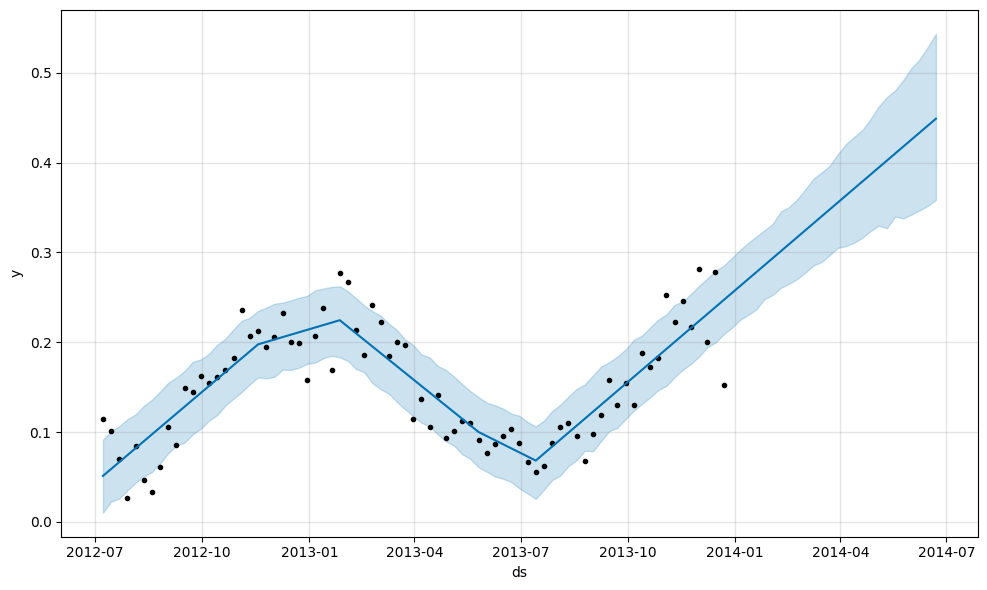

In [157]:
# Create a more appropriate model for this data
m3 = Prophet(
    changepoint_prior_scale=0.5,     # Increase to allow more flexibility in the trend
    seasonality_prior_scale=0.01,    # Reduce seasonality impact
    seasonality_mode='multiplicative' # Try multiplicative mode as data shows changing variance
)

# Remove the custom yearly seasonality or reduce its complexity
# Let Prophet handle the basic seasonality components

# If your data has outliers, you might consider:
# 1. Data preprocessing to remove outliers
# 2. Using a robust fitting method

m3.fit(train)

future = m3.make_future_dataframe(periods=26, freq='W')
forecast = m3.predict(future)

# Plot the forecast
fig = m3.plot(forecast)

# You can also try plotting components to understand the model better
# m3.plot_components(forecast)

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfyyvcqc/siupkl9b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfyyvcqc/jfs6supw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81727', 'data', 'file=/tmp/tmpzfyyvcqc/siupkl9b.json', 'init=/tmp/tmpzfyyvcqc/jfs6supw.json', 'output', 'file=/tmp/tmpzfyyvcqc/prophet_modelfw_q9r29/prophet_model-20250422215212.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:52:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:52:12 - cmdstanpy - INFO - Chain [1] d

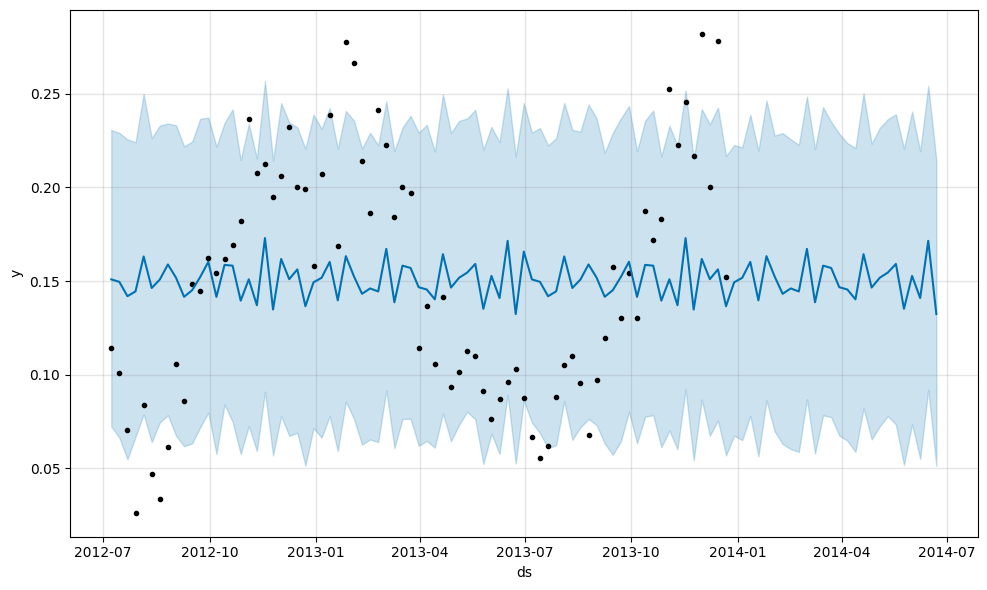

In [183]:
# Creating a Prophet model that respects cyclical patterns
m = Prophet(
    changepoint_range=1, n_changepoints=10, changepoint_prior_scale=250,   # Keep this relatively low for smoothness
    seasonality_mode='multiplicative'  # Better for data with changing amplitudes
)

# Add appropriate seasonality components
# For example, if you have weekly data with yearly cycles:
m.add_seasonality(name='yearly', period=52, fourier_order=4)

# If there's a known cycle length, add it explicitly
# For example, if there's a 26-week cycle:
m.add_seasonality(name='custom_cycle', period=2, fourier_order=2)

# Prevent Prophet from extrapolating trends too strongly
m.growth = 'flat'  # This prevents the strong upward trend in the forecast

m.fit(train)

future = m.make_future_dataframe(periods=26, freq='W')
forecast = m.predict(future)

m.plot(forecast);

Prompt: data is seasonal yearly, there also might be another seasonal component weekly, suggest me parameters for prophet model that can capture these components of the data well along with the trend.

## **Best Fit Model**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfyyvcqc/_k0s593f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfyyvcqc/fhwqt_0y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14110', 'data', 'file=/tmp/tmpzfyyvcqc/_k0s593f.json', 'init=/tmp/tmpzfyyvcqc/fhwqt_0y.json', 'output', 'file=/tmp/tmpzfyyvcqc/prophet_modelo_1iy2if/prophet_model-20250422222940.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:29:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:29:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


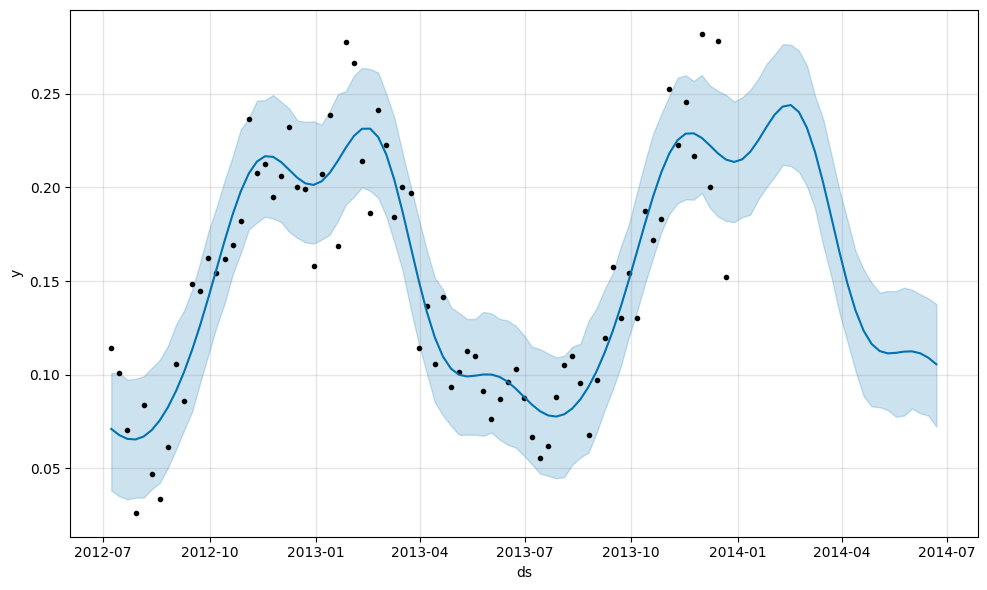

In [237]:
m = Prophet(
    changepoint_prior_scale=0.01,  # Very small value for a smooth trend
    seasonality_prior_scale=15,     # Emphasize the seasonal component
    seasonality_mode='additive',    # Using additive seasonality as specified
    n_changepoints=3,               # Minimal changepoints for smoother waves
    yearly_seasonality=4,        # Turn off default yearly to use custom settings
    weekly_seasonality=1        # Turn off default weekly
)

# Fit the model
m.fit(train)

# Create future dataframe for forecasting
future = m.make_future_dataframe(periods=26, freq='W')
forecast = m.predict(future)

# Plot the results
fig = m.plot(forecast)

# **Model Evaluation and Forecasting**

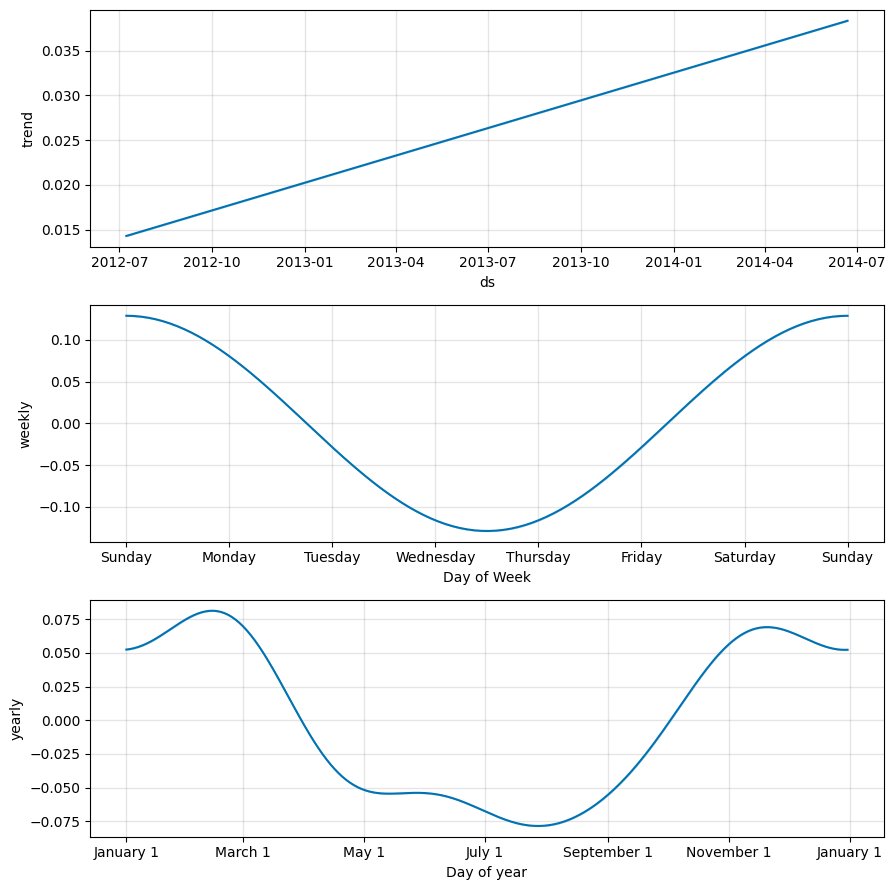

In [238]:
m.plot_components(forecast);

In [239]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [248]:
df_cv = cross_validation(m, initial='13 W', period='1 W', horizon='4 W')

INFO:prophet:Making 60 forecasts with cutoffs between 2012-10-07 00:00:00 and 2013-11-24 00:00:00


  0%|          | 0/60 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfyyvcqc/psxli73c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfyyvcqc/b4jk9jb0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5695', 'data', 'file=/tmp/tmpzfyyvcqc/psxli73c.json', 'init=/tmp/tmpzfyyvcqc/b4jk9jb0.json', 'output', 'file=/tmp/tmpzfyyvcqc/prophet_modelaj_jheca/prophet_model-20250422224038.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:40:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:40:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfyyvcqc/xzz9fhjj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfyyvcqc/fzegb481.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [249]:
df_cv.groupby('cutoff').count()

,ds,yhat,yhat_lower,yhat_upper,y
cutoff,,,,,
2012-10-07,4,4,4,4,4
2012-10-14,4,4,4,4,4
2012-10-21,4,4,4,4,4
2012-10-28,4,4,4,4,4
2012-11-04,4,4,4,4,4
2012-11-11,4,4,4,4,4
2012-11-18,4,4,4,4,4
2012-11-25,4,4,4,4,4
2012-12-02,4,4,4,4,4


In [250]:
metrics = performance_metrics(df_cv)
metrics

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,7 days,0.002800,0.052911,0.038380,0.245915,0.179348,0.261373,0.533333
1,14 days,0.010404,0.101998,0.070373,0.421606,0.308333,0.514104,0.433333
2,21 days,0.031783,0.178278,0.116604,0.708246,0.448251,0.711501,0.266667
3,28 days,0.085867,0.293031,0.183871,1.075173,0.727619,0.865587,0.250000


Error numbers are acceptable. The model seems to capture the data components well. But the coverage numbers are lower than 0.8 by far, this might be due to the model not being able to capture noisy points where changes happen unpredictably, we also don't have lots of data, we have close to 100 points only, many of which have some noise component.

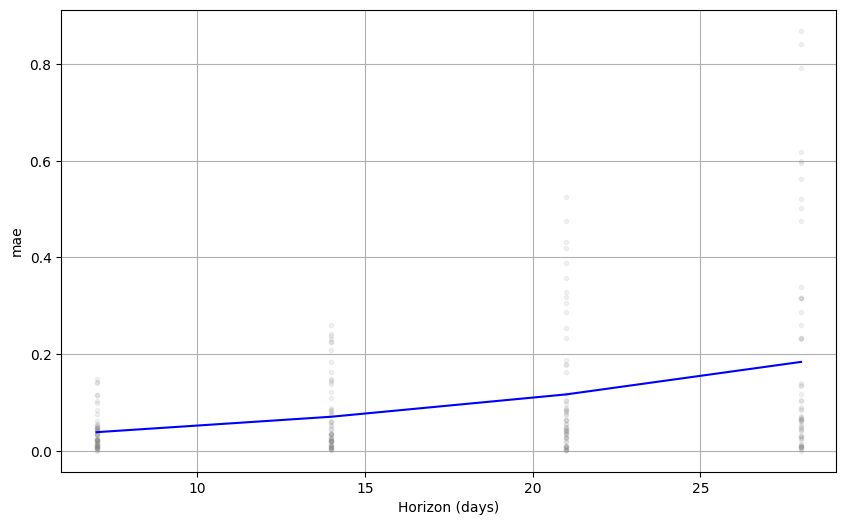

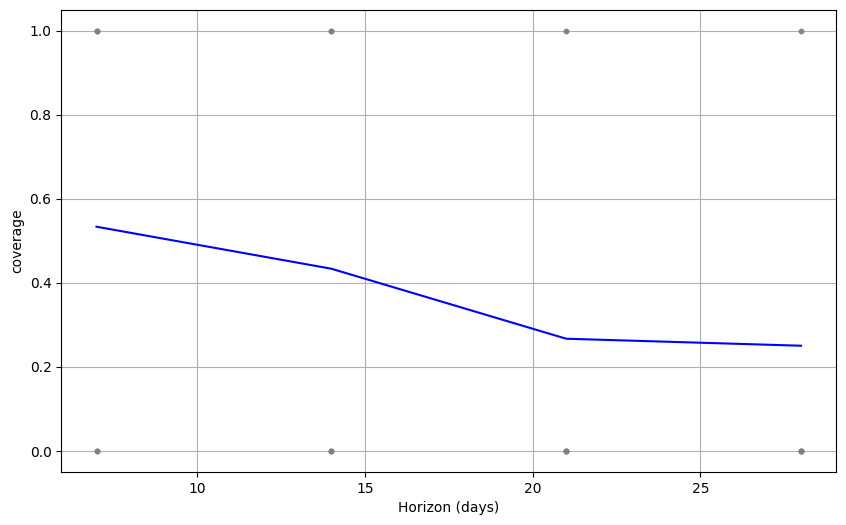

In [251]:
plot_cross_validation_metric(df_cv, metric='mae');
plot_cross_validation_metric(df_cv, metric='coverage');

$$Thank\ You\ For\ Reading\ This\ Notebook$$